[View in Colaboratory](https://colab.research.google.com/github/Shreeyash-iitr/Deep_Learning/blob/master/Cats_V_S_Dogs.ipynb)

In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreeyash6199","key":"fa0ace82f613ab882fd3fb0b94916db0"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

>Now download kaggle dataset.

In [7]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 94%|██████████████████████████████████████▍  | 254M/271M [00:02<00:00, 118MB/s]
100%|█████████████████████████████████████████| 271M/271M [00:02<00:00, 132MB/s]
 99%|████████████████████████████████████████▋| 539M/544M [00:04<00:00, 189MB/s]
100%|█████████████████████████████████████████| 544M/544M [00:04<00:00, 140MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 53.2MB/s]


In [0]:
!ls train

In [0]:
!unzip test.zip

In [0]:
!unzip train.zip



*   import all required libraries 
*   we will use tensorflow layers framework.



In [0]:
import os
import cv2
import random
import numpy
import pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras import layers
%matplotlib inline



> **Preprocessing Images**

> >resizing images to shape (100,100,3) and then storing dataset into a numpy array. OpenCV is used for basic processing on images.



In [0]:
images = []
labels = []

for img in os.listdir('train/'):
    path = "train/" + str(img) 
    image = cv2.imread(str(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64))
    images.append(image)
    if img[:3] == "cat":                  # cat >> 0
        labels.append(int(0))
    elif img[:3] == "dog":                # dog >> 1
        labels.append(int(1))

images = numpy.array(images)
labels = numpy.array(labels)        

> > Note that here I am reshaping y_train and y_test array to [-1,1] because it will convert its shape from (?, ) to (?, 1). It will reduce future errors. 

In [0]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(images, labels, test_size=0.05)
y_train = numpy.asarray(y_train, dtype = 'int')
y_train = numpy.reshape(y_train,[-1,1])
y_test = numpy.reshape(y_test,[-1,1])


array([0])

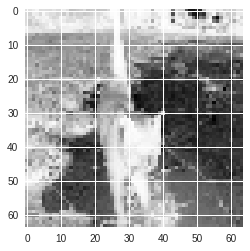

In [42]:
gray = cv2.cvtColor(X_test[1], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
y_test[1]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3,activation=layers.activations.relu,data_format='channels_last',input_shape=[64,64,3]))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=512, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation=layers.activations.relu))
model.add(layers.Dense(128,activation=layers.activations.relu))
model.add(layers.Dense(2, activation=layers.activations.softmax))

In [0]:
model.compile(optimizer = keras.optimizers.Adam(lr=1e-5),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard
from time import time
tensorboard_ = TensorBoard(log_dir="logs/{}".format(time()))

In [68]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=100,verbose=2,validation_split = 0.1, callbacks=[tensorboard_])


Train on 21375 samples, validate on 2375 samples
Epoch 1/100
 - 9s - loss: 0.3762 - acc: 0.8351 - val_loss: 0.4274 - val_acc: 0.8034
Epoch 2/100
 - 9s - loss: 0.3733 - acc: 0.8383 - val_loss: 0.4247 - val_acc: 0.8025
Epoch 3/100
 - 9s - loss: 0.3726 - acc: 0.8366 - val_loss: 0.4302 - val_acc: 0.8008
Epoch 4/100
 - 9s - loss: 0.3685 - acc: 0.8406 - val_loss: 0.4217 - val_acc: 0.8029
Epoch 5/100
 - 9s - loss: 0.3680 - acc: 0.8400 - val_loss: 0.4249 - val_acc: 0.8059
Epoch 6/100
 - 9s - loss: 0.3687 - acc: 0.8372 - val_loss: 0.4207 - val_acc: 0.8059
Epoch 7/100
 - 9s - loss: 0.3693 - acc: 0.8363 - val_loss: 0.4262 - val_acc: 0.7987
Epoch 8/100
 - 9s - loss: 0.3646 - acc: 0.8401 - val_loss: 0.4195 - val_acc: 0.8067
Epoch 9/100
 - 9s - loss: 0.3597 - acc: 0.8451 - val_loss: 0.4222 - val_acc: 0.8042
Epoch 10/100
 - 9s - loss: 0.3580 - acc: 0.8464 - val_loss: 0.4206 - val_acc: 0.8063
Epoch 11/100
 - 9s - loss: 0.3534 - acc: 0.8494 - val_loss: 0.4221 - val_acc: 0.7996
Epoch 12/100
 - 9s - loss

In [69]:
score=model.evaluate(x=X_test, y=y_test)
print(score)

1250/1250 [==============================] - 0s 291us/step
[0.4247236147105694, 0.8184]


In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 512)         590336    
__________

In [67]:
model2 = Sequential()
model2.add(layers.Conv2D(filters=32, kernel_size=3,activation=layers.activations.relu,data_format='channels_last',input_shape=[64,64,3]))
model2.add(layers.MaxPool2D(pool_size=2,strides=2))
model2.add(layers.Conv2D(filters=64, kernel_size=3,activation=layers.activations.relu))
model2.add(layers.MaxPool2D(pool_size=2,strides=2))
model2.add(layers.Flatten())
model2.add(layers.Dense(128,activation=layers.activations.relu))
model2.add(layers.Dense(128,activation=layers.activations.relu))
model2.add(layers.Dense(2, activation=layers.activations.softmax))
model2.compile(optimizer = keras.optimizers.Adam(lr=1e-5),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model2.fit(x=X_train, y=y_train, batch_size=128, epochs=100,verbose=2,validation_split = 0.1)

Train on 21375 samples, validate on 2375 samples
Epoch 1/100
 - 7s - loss: 0.6812 - acc: 0.5777 - val_loss: 0.6672 - val_acc: 0.6219
Epoch 2/100
 - 7s - loss: 0.6545 - acc: 0.6388 - val_loss: 0.6439 - val_acc: 0.6387
Epoch 3/100
 - 7s - loss: 0.6288 - acc: 0.6681 - val_loss: 0.6165 - val_acc: 0.6716
Epoch 4/100
 - 7s - loss: 0.6080 - acc: 0.6811 - val_loss: 0.6007 - val_acc: 0.6762
Epoch 5/100
 - 7s - loss: 0.5927 - acc: 0.6923 - val_loss: 0.5863 - val_acc: 0.6956
Epoch 6/100
 - 7s - loss: 0.5784 - acc: 0.7055 - val_loss: 0.5765 - val_acc: 0.6956
Epoch 7/100
 - 7s - loss: 0.5665 - acc: 0.7146 - val_loss: 0.5660 - val_acc: 0.7069
Epoch 8/100
 - 7s - loss: 0.5564 - acc: 0.7222 - val_loss: 0.5610 - val_acc: 0.7040
Epoch 9/100
 - 7s - loss: 0.5465 - acc: 0.7288 - val_loss: 0.5522 - val_acc: 0.7221
Epoch 10/100
 - 7s - loss: 0.5380 - acc: 0.7360 - val_loss: 0.5469 - val_acc: 0.7158
Epoch 11/100
 - 7s - loss: 0.5310 - acc: 0.7407 - val_loss: 0.5406 - val_acc: 0.7267
Epoch 12/100
 - 7s - loss

KeyboardInterrupt: ignored

In [64]:
score2=model2.evaluate(x=X_test, y=y_test)
print(score2)

1250/1250 [==============================] - 0s 292us/step
[0.4587086442947388, 0.7944]


In [63]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
__________